### Busqueda micro-agujeros

In [1]:
import netCDF4 as nc
import numpy as np
import os

def analyze_hourly_ozone_in_uruguay(file_path, ozone_var="TO3", lat_var="lat", lon_var="lon"):
    """Analyzes hourly ozone data in Uruguay for minimum, maximum, and values ≤ 220."""
    
    try:
        
        # Open the .nc4 file
        with nc.Dataset(file_path, "r") as dataset:
            # Load latitude, longitude, time, and ozone data
            latitudes = dataset.variables[lat_var][:]
            longitudes = dataset.variables[lon_var][:]
            ozone_data = dataset.variables[ozone_var][:]  # Shape: (time, lat, lon)
    
            # Handle missing or invalid values (e.g., fill values)
            ozone_data = np.where(ozone_data < 0, np.nan, ozone_data)
    
            # Define Uruguay's bounds
            lat_min, lat_max = -35, -30
            lon_min, lon_max = -58, -53
    
            # Mask data outside Uruguay's bounds
            lat_mask = (latitudes >= lat_min) & (latitudes <= lat_max)
            lon_mask = (longitudes >= lon_min) & (longitudes <= lon_max)
    
            # Subset latitudes and longitudes for Uruguay
            uruguay_lats = latitudes[lat_mask]
            uruguay_lons = longitudes[lon_mask]
    
            for hour in range(ozone_data.shape[0]):  # Iterate over time dimension
                
                # Subset data for the current hour
                hourly_data = ozone_data[hour, :, :]
    
                # Ensure the data dimensions match the latitude and longitude masks
                uruguay_data = hourly_data[np.ix_(lat_mask, lon_mask)]
    
                # Check if Uruguay data is valid
                if uruguay_data.size == 0:
                    print("No data available for Uruguay in this hour.")
                    continue
    
                # Find the minimum and maximum ozone levels in Uruguay
                min_ozone_value = np.nanmin(uruguay_data)
                max_ozone_value = np.nanmax(uruguay_data)
    
                # Find the locations (indices) of the min and max values
                min_indices = np.where(uruguay_data == min_ozone_value)
                max_indices = np.where(uruguay_data == max_ozone_value)
    
                # Convert indices to latitudes and longitudes
                min_lat = uruguay_lats[min_indices[0][0]]
                min_lon = uruguay_lons[min_indices[1][0]]
                max_lat = uruguay_lats[max_indices[0][0]]
                max_lon = uruguay_lons[max_indices[1][0]]
    
                # Print the minimum and maximum values
                print(f"Lowest ozone level: {min_ozone_value:.2f}")
                print(f"  Latitude: {min_lat:.2f}, Longitude: {min_lon:.2f}")
                print(f"Highest ozone level: {max_ozone_value:.2f}")
                print(f"  Latitude: {max_lat:.2f}, Longitude: {max_lon:.2f}")
    
                # Find indices within Uruguay where ozone level is ≤ 220
                low_ozone_indices = np.where(uruguay_data <= 220)
    
                # Print results for ozone ≤ 220
                if low_ozone_indices[0].size == 0:
                    pass
                    # print("No data points with ozone levels ≤ 220 found in Uruguay.")
                else:
                    print(f"\n--- Hour {hour + 1} ---")
                    print(f"\nFound {len(low_ozone_indices[0])} data points with ozone levels ≤ 220:")
                    for idx in range(len(low_ozone_indices[0])):
                        lat = uruguay_lats[low_ozone_indices[0][idx]]
                        lon = uruguay_lons[low_ozone_indices[1][idx]]
                        val = uruguay_data[low_ozone_indices[0][idx], low_ozone_indices[1][idx]]
                        print(f"Latitude: {lat:.2f}, Longitude: {lon:.2f}, Ozone Level: {val:.2f}")

    except:
        pass
    
def main():
    for file in os.listdir('M2T1NXSLV'):
        file_path = f"./M2T1NXSLV/{file}"  # Replace with your .nc4 file path
        analyze_hourly_ozone_in_uruguay(file_path, ozone_var="TO3", lat_var="lat", lon_var="lon")

if __name__ == "__main__":
    main()


Lowest ozone level: 280.73
  Latitude: -30.00, Longitude: -55.00
Highest ozone level: 299.17
  Latitude: -33.50, Longitude: -54.38
Lowest ozone level: 282.98
  Latitude: -30.00, Longitude: -54.38
Highest ozone level: 299.57
  Latitude: -33.50, Longitude: -54.38
Lowest ozone level: 281.91
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 299.06
  Latitude: -33.50, Longitude: -54.38
Lowest ozone level: 280.72
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 298.36
  Latitude: -33.00, Longitude: -53.12
Lowest ozone level: 280.10
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 297.66
  Latitude: -32.50, Longitude: -53.12
Lowest ozone level: 279.68
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 297.34
  Latitude: -32.00, Longitude: -53.12
Lowest ozone level: 279.49
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 296.86
  Latitude: -32.00, Longitude: -53.12
Lowest ozone level: 279.10
  Latitude: -30.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 288.64
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 301.53
  Latitude: -32.50, Longitude: -53.12
Lowest ozone level: 287.53
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 300.56
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 286.35
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 300.05
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 285.17
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 299.14
  Latitude: -31.00, Longitude: -53.12
Lowest ozone level: 284.14
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 299.67
  Latitude: -33.50, Longitude: -57.50
Lowest ozone level: 283.93
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 301.31
  Latitude: -33.50, Longitude: -57.50
Lowest ozone level: 284.06
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 302.03
  Latitude: -33.50, Longitude: -57.50
Lowest ozone level: 283.42
  Latitude: -30.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 269.86
  Latitude: -32.50, Longitude: -57.50
Highest ozone level: 282.67
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 270.42
  Latitude: -32.00, Longitude: -56.88
Highest ozone level: 280.98
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 270.18
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 278.10
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 269.75
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 277.43
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 269.43
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 277.11
  Latitude: -34.50, Longitude: -54.38
Lowest ozone level: 268.55
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 278.40
  Latitude: -34.50, Longitude: -53.75
Lowest ozone level: 268.62
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 278.70
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 268.67
  Latitude: -30.50, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 253.91
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 271.91
  Latitude: -35.00, Longitude: -55.62
Lowest ozone level: 253.80
  Latitude: -31.00, Longitude: -56.88
Highest ozone level: 271.85
  Latitude: -35.00, Longitude: -54.38
Lowest ozone level: 254.63
  Latitude: -31.00, Longitude: -56.25
Highest ozone level: 271.18
  Latitude: -35.00, Longitude: -54.38
Lowest ozone level: 255.38
  Latitude: -31.00, Longitude: -56.25
Highest ozone level: 270.28
  Latitude: -35.00, Longitude: -53.75
Lowest ozone level: 256.53
  Latitude: -31.00, Longitude: -55.62
Highest ozone level: 269.80
  Latitude: -35.00, Longitude: -54.38
Lowest ozone level: 257.42
  Latitude: -31.00, Longitude: -55.62
Highest ozone level: 270.53
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 258.73
  Latitude: -31.00, Longitude: -55.62
Highest ozone level: 271.03
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 259.72
  Latitude: -31.00, Longitude: -55.00
Highest ozone leve

Lowest ozone level: 272.80
  Latitude: -32.00, Longitude: -57.50
Highest ozone level: 284.03
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 273.15
  Latitude: -32.00, Longitude: -57.50
Highest ozone level: 282.80
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 272.03
  Latitude: -32.00, Longitude: -57.50
Highest ozone level: 281.58
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 270.70
  Latitude: -32.00, Longitude: -57.50
Highest ozone level: 280.94
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 269.04
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 280.39
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 268.22
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 280.03
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 267.86
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 280.27
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 267.18
  Latitude: -31.00, Longitude: -55.62
Highest ozone leve

Lowest ozone level: 267.76
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 280.90
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 267.54
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 279.98
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 267.25
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 278.89
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 266.54
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 278.13
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 265.67
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 277.58
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 265.43
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 277.53
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 265.07
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 277.63
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 264.74
  Latitude: -30.00, Longitude: -56.88
Highest ozone leve

Lowest ozone level: 271.82
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 296.62
  Latitude: -35.00, Longitude: -53.75
Lowest ozone level: 271.74
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 298.46
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 271.27
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 300.05
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 270.52
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 300.48
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 270.09
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 300.09
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 269.87
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 300.10
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 270.27
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 300.02
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 269.89
  Latitude: -30.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 275.07
  Latitude: -35.00, Longitude: -56.88
Highest ozone level: 295.94
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 274.45
  Latitude: -34.00, Longitude: -56.25
Highest ozone level: 295.38
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 273.54
  Latitude: -34.00, Longitude: -56.25
Highest ozone level: 294.54
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 273.18
  Latitude: -34.00, Longitude: -56.25
Highest ozone level: 292.76
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 273.15
  Latitude: -34.00, Longitude: -56.25
Highest ozone level: 290.90
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 272.81
  Latitude: -33.50, Longitude: -55.62
Highest ozone level: 289.23
  Latitude: -31.00, Longitude: -53.12
Lowest ozone level: 271.57
  Latitude: -34.00, Longitude: -55.00
Highest ozone level: 287.51
  Latitude: -31.00, Longitude: -53.12
Lowest ozone level: 270.64
  Latitude: -34.00, Longitude: -55.00
Highest ozone leve

Lowest ozone level: 262.86
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 284.79
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 262.67
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 284.38
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 262.39
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 284.12
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 262.22
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 283.68
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 262.28
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 283.35
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 262.57
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 283.73
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 262.96
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 283.90
  Latitude: -33.00, Longitude: -54.38
Lowest ozone level: 263.34
  Latitude: -35.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 264.64
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 277.35
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 263.98
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 277.07
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 263.72
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 276.52
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 263.74
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 275.49
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 263.80
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 274.41
  Latitude: -30.50, Longitude: -53.12
Lowest ozone level: 263.93
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 273.78
  Latitude: -30.50, Longitude: -53.12
Lowest ozone level: 264.05
  Latitude: -34.50, Longitude: -55.00
Highest ozone level: 275.25
  Latitude: -32.00, Longitude: -57.50
Lowest ozone level: 264.04
  Latitude: -34.00, Longitude: -55.62
Highest ozone leve

Lowest ozone level: 263.65
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 272.66
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 264.48
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 271.72
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 264.66
  Latitude: -33.00, Longitude: -57.50
Highest ozone level: 271.73
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 264.07
  Latitude: -33.00, Longitude: -57.50
Highest ozone level: 270.21
  Latitude: -33.00, Longitude: -53.12
Lowest ozone level: 263.60
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 269.11
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 261.93
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 269.46
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 260.44
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 270.13
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 259.20
  Latitude: -35.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 263.72
  Latitude: -30.50, Longitude: -56.88
Highest ozone level: 279.80
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 262.71
  Latitude: -30.50, Longitude: -56.88
Highest ozone level: 280.00
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 261.11
  Latitude: -30.50, Longitude: -56.25
Highest ozone level: 279.84
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 261.38
  Latitude: -30.50, Longitude: -56.25
Highest ozone level: 279.25
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 263.20
  Latitude: -30.50, Longitude: -56.25
Highest ozone level: 278.30
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 265.14
  Latitude: -30.50, Longitude: -56.25
Highest ozone level: 277.65
  Latitude: -31.50, Longitude: -53.12
Lowest ozone level: 267.26
  Latitude: -30.50, Longitude: -56.25
Highest ozone level: 277.58
  Latitude: -35.00, Longitude: -56.88
Lowest ozone level: 269.33
  Latitude: -30.50, Longitude: -56.25
Highest ozone leve

Lowest ozone level: 259.42
  Latitude: -35.00, Longitude: -55.00
Highest ozone level: 271.91
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 259.38
  Latitude: -35.00, Longitude: -55.00
Highest ozone level: 272.36
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 259.56
  Latitude: -35.00, Longitude: -55.00
Highest ozone level: 272.52
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 259.73
  Latitude: -35.00, Longitude: -55.00
Highest ozone level: 272.26
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 258.54
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 272.30
  Latitude: -30.00, Longitude: -53.75
Lowest ozone level: 257.83
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 272.17
  Latitude: -30.00, Longitude: -53.75
Lowest ozone level: 257.90
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 271.91
  Latitude: -30.00, Longitude: -53.75
Lowest ozone level: 258.05
  Latitude: -35.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 247.03
  Latitude: -34.50, Longitude: -54.38
Highest ozone level: 258.76
  Latitude: -30.50, Longitude: -53.75
Lowest ozone level: 244.70
  Latitude: -35.00, Longitude: -53.75
Highest ozone level: 258.13
  Latitude: -30.50, Longitude: -53.75
Lowest ozone level: 244.20
  Latitude: -35.00, Longitude: -53.12
Highest ozone level: 257.31
  Latitude: -30.50, Longitude: -53.12
Lowest ozone level: 244.74
  Latitude: -35.00, Longitude: -53.12
Highest ozone level: 257.05
  Latitude: -30.00, Longitude: -56.25
Lowest ozone level: 247.26
  Latitude: -35.00, Longitude: -53.12
Highest ozone level: 257.25
  Latitude: -30.00, Longitude: -56.25
Lowest ozone level: 251.87
  Latitude: -32.50, Longitude: -54.38
Highest ozone level: 257.85
  Latitude: -30.00, Longitude: -55.62
Lowest ozone level: 252.37
  Latitude: -32.50, Longitude: -54.38
Highest ozone level: 258.37
  Latitude: -30.00, Longitude: -55.62
Lowest ozone level: 253.19
  Latitude: -32.50, Longitude: -54.38
Highest ozone leve

Lowest ozone level: 265.87
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 280.11
  Latitude: -32.50, Longitude: -56.25
Lowest ozone level: 266.39
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 278.78
  Latitude: -32.50, Longitude: -56.25
Lowest ozone level: 265.37
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 277.81
  Latitude: -32.00, Longitude: -55.00
Lowest ozone level: 264.48
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 276.73
  Latitude: -31.50, Longitude: -54.38
Lowest ozone level: 264.02
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 276.39
  Latitude: -31.50, Longitude: -54.38
Lowest ozone level: 264.17
  Latitude: -31.50, Longitude: -57.50
Highest ozone level: 276.28
  Latitude: -31.50, Longitude: -53.75
Lowest ozone level: 262.79
  Latitude: -31.50, Longitude: -57.50
Highest ozone level: 276.18
  Latitude: -31.50, Longitude: -53.75
Lowest ozone level: 262.22
  Latitude: -31.50, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 258.78
  Latitude: -30.00, Longitude: -53.75
Highest ozone level: 285.45
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 259.95
  Latitude: -30.00, Longitude: -53.75
Highest ozone level: 284.67
  Latitude: -35.00, Longitude: -56.88
Lowest ozone level: 260.99
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 284.67
  Latitude: -34.50, Longitude: -56.88
Lowest ozone level: 262.28
  Latitude: -33.50, Longitude: -53.12
Highest ozone level: 283.66
  Latitude: -34.50, Longitude: -56.88
Lowest ozone level: 262.60
  Latitude: -33.50, Longitude: -53.12
Highest ozone level: 283.24
  Latitude: -34.50, Longitude: -56.25
Lowest ozone level: 263.33
  Latitude: -33.00, Longitude: -53.12
Highest ozone level: 282.88
  Latitude: -34.50, Longitude: -56.25
Lowest ozone level: 263.95
  Latitude: -31.50, Longitude: -53.12
Highest ozone level: 282.24
  Latitude: -34.00, Longitude: -56.25
Lowest ozone level: 264.49
  Latitude: -31.50, Longitude: -53.12
Highest ozone leve

Lowest ozone level: 258.47
  Latitude: -35.00, Longitude: -56.88
Highest ozone level: 267.01
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 258.08
  Latitude: -35.00, Longitude: -56.88
Highest ozone level: 267.19
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 258.26
  Latitude: -35.00, Longitude: -56.25
Highest ozone level: 267.25
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 258.13
  Latitude: -32.50, Longitude: -56.88
Highest ozone level: 267.40
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 257.71
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 267.40
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 257.29
  Latitude: -34.00, Longitude: -56.88
Highest ozone level: 267.22
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 256.70
  Latitude: -34.00, Longitude: -56.88
Highest ozone level: 267.18
  Latitude: -30.00, Longitude: -53.12
Lowest ozone level: 256.16
  Latitude: -34.00, Longitude: -56.88
Highest ozone leve

Lowest ozone level: 250.33
  Latitude: -32.00, Longitude: -53.12
Highest ozone level: 257.71
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 249.96
  Latitude: -31.50, Longitude: -53.12
Highest ozone level: 258.93
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 249.58
  Latitude: -31.50, Longitude: -53.12
Highest ozone level: 260.42
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 249.36
  Latitude: -31.50, Longitude: -53.12
Highest ozone level: 261.21
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 249.10
  Latitude: -31.50, Longitude: -53.12
Highest ozone level: 261.54
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 248.69
  Latitude: -31.50, Longitude: -55.00
Highest ozone level: 261.70
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 248.95
  Latitude: -33.50, Longitude: -53.12
Highest ozone level: 261.66
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 249.28
  Latitude: -31.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 258.47
  Latitude: -30.50, Longitude: -55.62
Highest ozone level: 289.56
  Latitude: -35.00, Longitude: -55.62
Lowest ozone level: 259.19
  Latitude: -30.50, Longitude: -55.62
Highest ozone level: 290.50
  Latitude: -35.00, Longitude: -55.62
Lowest ozone level: 259.80
  Latitude: -30.50, Longitude: -55.62
Highest ozone level: 291.28
  Latitude: -35.00, Longitude: -54.38
Lowest ozone level: 260.35
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 292.61
  Latitude: -35.00, Longitude: -53.75
Lowest ozone level: 260.52
  Latitude: -31.00, Longitude: -54.38
Highest ozone level: 293.42
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 261.07
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 291.40
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 261.31
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 287.90
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 261.97
  Latitude: -30.00, Longitude: -55.62
Highest ozone leve

Lowest ozone level: 254.45
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 263.58
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 254.14
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 263.51
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 253.94
  Latitude: -34.00, Longitude: -55.00
Highest ozone level: 263.75
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 253.77
  Latitude: -34.00, Longitude: -55.00
Highest ozone level: 264.05
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 253.45
  Latitude: -34.00, Longitude: -54.38
Highest ozone level: 263.96
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 252.63
  Latitude: -34.00, Longitude: -53.12
Highest ozone level: 263.72
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 252.94
  Latitude: -34.00, Longitude: -53.12
Highest ozone level: 264.02
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 253.74
  Latitude: -32.00, Longitude: -53.12
Highest ozone leve

Lowest ozone level: 251.62
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 262.78
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 251.91
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 262.07
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 252.15
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 261.66
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 252.19
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 261.88
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 251.99
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 261.60
  Latitude: -34.50, Longitude: -53.12
Lowest ozone level: 251.66
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 261.28
  Latitude: -33.00, Longitude: -53.75
Lowest ozone level: 251.47
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 261.08
  Latitude: -33.50, Longitude: -53.12
Lowest ozone level: 251.64
  Latitude: -30.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 252.77
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 268.19
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 252.86
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 267.89
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 252.94
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 266.97
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 252.68
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 265.98
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 252.08
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 266.13
  Latitude: -35.00, Longitude: -56.88
Lowest ozone level: 251.41
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 266.75
  Latitude: -35.00, Longitude: -56.25
Lowest ozone level: 251.40
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 266.70
  Latitude: -35.00, Longitude: -56.25
Lowest ozone level: 251.87
  Latitude: -30.50, Longitude: -55.00
Highest ozone leve

Lowest ozone level: 245.72
  Latitude: -35.00, Longitude: -55.62
Highest ozone level: 253.65
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 244.21
  Latitude: -35.00, Longitude: -53.12
Highest ozone level: 252.71
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 243.70
  Latitude: -35.00, Longitude: -56.88
Highest ozone level: 253.17
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 242.84
  Latitude: -35.00, Longitude: -56.88
Highest ozone level: 253.22
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 242.17
  Latitude: -35.00, Longitude: -57.50
Highest ozone level: 252.87
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 240.35
  Latitude: -34.50, Longitude: -57.50
Highest ozone level: 252.29
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 240.29
  Latitude: -34.50, Longitude: -56.88
Highest ozone level: 251.97
  Latitude: -30.50, Longitude: -57.50
Lowest ozone level: 240.23
  Latitude: -34.50, Longitude: -56.25
Highest ozone leve

Lowest ozone level: 251.08
  Latitude: -31.50, Longitude: -56.25
Highest ozone level: 258.10
  Latitude: -35.00, Longitude: -57.50
Lowest ozone level: 251.91
  Latitude: -31.50, Longitude: -55.62
Highest ozone level: 258.06
  Latitude: -35.00, Longitude: -56.88
Lowest ozone level: 252.34
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 257.64
  Latitude: -35.00, Longitude: -56.88
Lowest ozone level: 252.65
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 257.22
  Latitude: -33.00, Longitude: -53.12
Lowest ozone level: 251.81
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 257.38
  Latitude: -33.00, Longitude: -53.12
Lowest ozone level: 251.64
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 257.68
  Latitude: -32.50, Longitude: -53.12
Lowest ozone level: 251.56
  Latitude: -33.50, Longitude: -56.88
Highest ozone level: 258.04
  Latitude: -32.50, Longitude: -53.12
Lowest ozone level: 251.30
  Latitude: -33.50, Longitude: -56.88
Highest ozone leve

Lowest ozone level: 257.70
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 273.53
  Latitude: -35.00, Longitude: -53.75
Lowest ozone level: 256.68
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 274.56
  Latitude: -35.00, Longitude: -53.75
Lowest ozone level: 255.77
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 275.29
  Latitude: -35.00, Longitude: -53.75
Lowest ozone level: 254.92
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 275.52
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 254.03
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 274.84
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 253.29
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 273.88
  Latitude: -34.00, Longitude: -53.12
Lowest ozone level: 252.85
  Latitude: -31.00, Longitude: -57.50
Highest ozone level: 272.77
  Latitude: -34.00, Longitude: -53.12
Lowest ozone level: 253.23
  Latitude: -31.00, Longitude: -57.50
Highest ozone leve

Lowest ozone level: 258.40
  Latitude: -30.00, Longitude: -53.12
Highest ozone level: 288.59
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 259.41
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 288.95
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 259.82
  Latitude: -30.00, Longitude: -57.50
Highest ozone level: 286.59
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 259.78
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 284.93
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 259.16
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 285.10
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 259.03
  Latitude: -30.00, Longitude: -55.62
Highest ozone level: 285.59
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 259.73
  Latitude: -30.00, Longitude: -56.88
Highest ozone level: 285.04
  Latitude: -35.00, Longitude: -53.12
Lowest ozone level: 260.92
  Latitude: -30.00, Longitude: -55.62
Highest ozone leve

Lowest ozone level: 264.89
  Latitude: -33.00, Longitude: -56.88
Highest ozone level: 276.91
  Latitude: -31.00, Longitude: -54.38
Lowest ozone level: 264.03
  Latitude: -33.00, Longitude: -56.88
Highest ozone level: 276.37
  Latitude: -31.00, Longitude: -54.38
Lowest ozone level: 263.18
  Latitude: -32.50, Longitude: -56.88
Highest ozone level: 276.20
  Latitude: -31.00, Longitude: -54.38
Lowest ozone level: 261.91
  Latitude: -34.00, Longitude: -55.00
Highest ozone level: 275.69
  Latitude: -31.00, Longitude: -54.38
Lowest ozone level: 261.09
  Latitude: -33.50, Longitude: -55.62
Highest ozone level: 274.88
  Latitude: -31.00, Longitude: -54.38
Lowest ozone level: 260.49
  Latitude: -33.50, Longitude: -55.00
Highest ozone level: 274.21
  Latitude: -31.00, Longitude: -54.38
Lowest ozone level: 260.41
  Latitude: -33.50, Longitude: -55.00
Highest ozone level: 273.58
  Latitude: -31.00, Longitude: -53.75
Lowest ozone level: 260.61
  Latitude: -33.00, Longitude: -54.38
Highest ozone leve

### Mapa

C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\emanu\Anaconda3\envs\nc4_env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


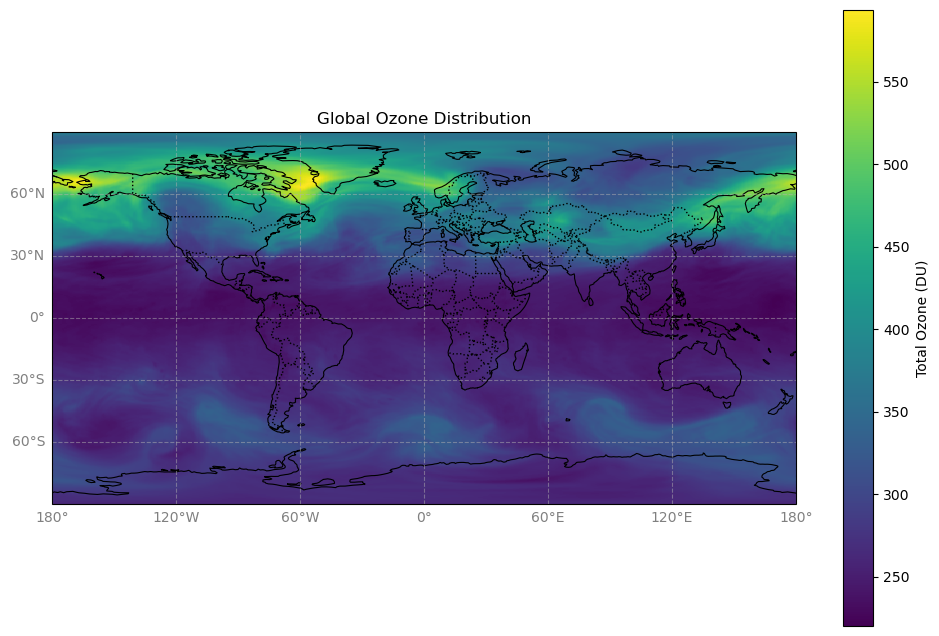

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import Dataset
# Open the NetCDF file
file_path = "./M2T1NXSLV/MERRA2_400.tavg1_2d_slv_Nx.20240201.nc4"  # Replace with your file path
nc_data = Dataset(file_path, mode='r')

# Extract the data
lon = nc_data.variables['lon'][:]  # Longitude
lat = nc_data.variables['lat'][:]  # Latitude
ozone = nc_data.variables['TO3'][3, :, :]  # Select the first time step for TO3 (Total Ozone)

# Create the plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree projection (latitude/longitude)

# Add world map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the ozone data on the map
mesh = plt.pcolormesh(lon, lat, ozone, transform=ccrs.PlateCarree(), cmap='viridis')
plt.colorbar(mesh, orientation='vertical', label='Total Ozone (DU)')  # Adjust label based on your units

# Add gridlines and labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gridlines.xlabels_top = False  # Disable labels at the top
gridlines.ylabels_right = False  # Disable labels on the right
gridlines.xlabel_style = {'size': 10, 'color': 'gray'}
gridlines.ylabel_style = {'size': 10, 'color': 'gray'}

# Set x and y ticks
#ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())  # Longitude from -180 to 180
#ax.set_yticks(range(-90, 91, 15), crs=ccrs.PlateCarree())  # Latitude from -90 to 90

# Add title
plt.title('Global Ozone Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()